In [435]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import missingno as msno
import random
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.model_selection import train_test_split



In [436]:
# Load dataset
df1 = pd.read_csv('RSU50-20249401-DataSet.csv')

# Display the first few rows of the dataset
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCEDATE,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,LASTPAYMENTDATE,NEXTPAYMENTDATE,...,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS,PROVINCECODE,TOTAL_PAYMENT,POLICY_STATUS
0,NJEV2018-453,ENDOW,49,2/25/2018,2018,M,24732,CASH,4/25/2018,5/25/2018 0:00,...,0,32,M,M,0,0,0,NRWTN,6183,LAPSE
1,NJEV2018-2541,ENDOW,49,10/19/2018,2018,M,24732,CASH,10/19/2018,11/19/2018 0:00,...,0,32,M,M,0,0,0,NRCTL,2061,LAPSE
2,NJEV2018-1209,ENDOW,49,5/25/2018,2018,M,24732,CASH,5/25/2018,6/25/2018 0:00,...,0,32,M,M,0,0,0,UVA,2061,LAPSE
3,NJEV2018-1378,ENDOW,49,6/11/2018,2018,M,24732,CASH,2/11/2020,3/11/2020 0:00,...,0,32,F,M,0,0,0,NRWTN,43281,LAPSE
4,NJEV2018-1853,ENDOW,49,8/8/2018,2018,M,24732,CASH,8/8/2018,9/8/2018 0:00,...,0,32,M,M,0,0,0,NRWTN,2061,LAPSE


In [437]:
print("The shape of the dataframe is: {}".format(df1.shape))

The shape of the dataframe is: (61053, 27)


In [438]:
df1.columns

Index(['POLICYNO', 'PRODUCT_TYPE', 'POLICYTERM_YEARS', 'COMMENCEDATE',
       'COMMENCED_YEAR', 'PAYMENT_FREQUENCY', 'ANNUAL_PREMIUM',
       'PAYMENT_METHOD', 'LASTPAYMENTDATE', 'NEXTPAYMENTDATE',
       'NEXTPAYMENT_YEAR', 'TENURE', 'NO_OF_COVERS', 'TOTAL_SUMINSURED',
       'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED',
       'OTHER COVERS_SUMINSURED', 'AGE', 'GENDER', 'MARITAL_STATUS',
       'NO_OF_SETTLED_CLAIMS', 'PAIDCLAIM_AMOUNT',
       'LAST_CLAIM_PROCESSTIME_DAYS', 'PROVINCECODE', 'TOTAL_PAYMENT',
       'POLICY_STATUS'],
      dtype='object')

In [439]:
# Basic dataset information

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61053 entries, 0 to 61052
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   POLICYNO                     61053 non-null  object
 1   PRODUCT_TYPE                 61053 non-null  object
 2   POLICYTERM_YEARS             61053 non-null  int64 
 3   COMMENCEDATE                 61053 non-null  object
 4   COMMENCED_YEAR               61053 non-null  int64 
 5   PAYMENT_FREQUENCY            61053 non-null  object
 6   ANNUAL_PREMIUM               61053 non-null  int64 
 7   PAYMENT_METHOD               61053 non-null  object
 8   LASTPAYMENTDATE              61053 non-null  object
 9   NEXTPAYMENTDATE              61053 non-null  object
 10  NEXTPAYMENT_YEAR             61053 non-null  int64 
 11  TENURE                       61053 non-null  int64 
 12  NO_OF_COVERS                 61053 non-null  int64 
 13  TOTAL_SUMINSURED             61

<Axes: >

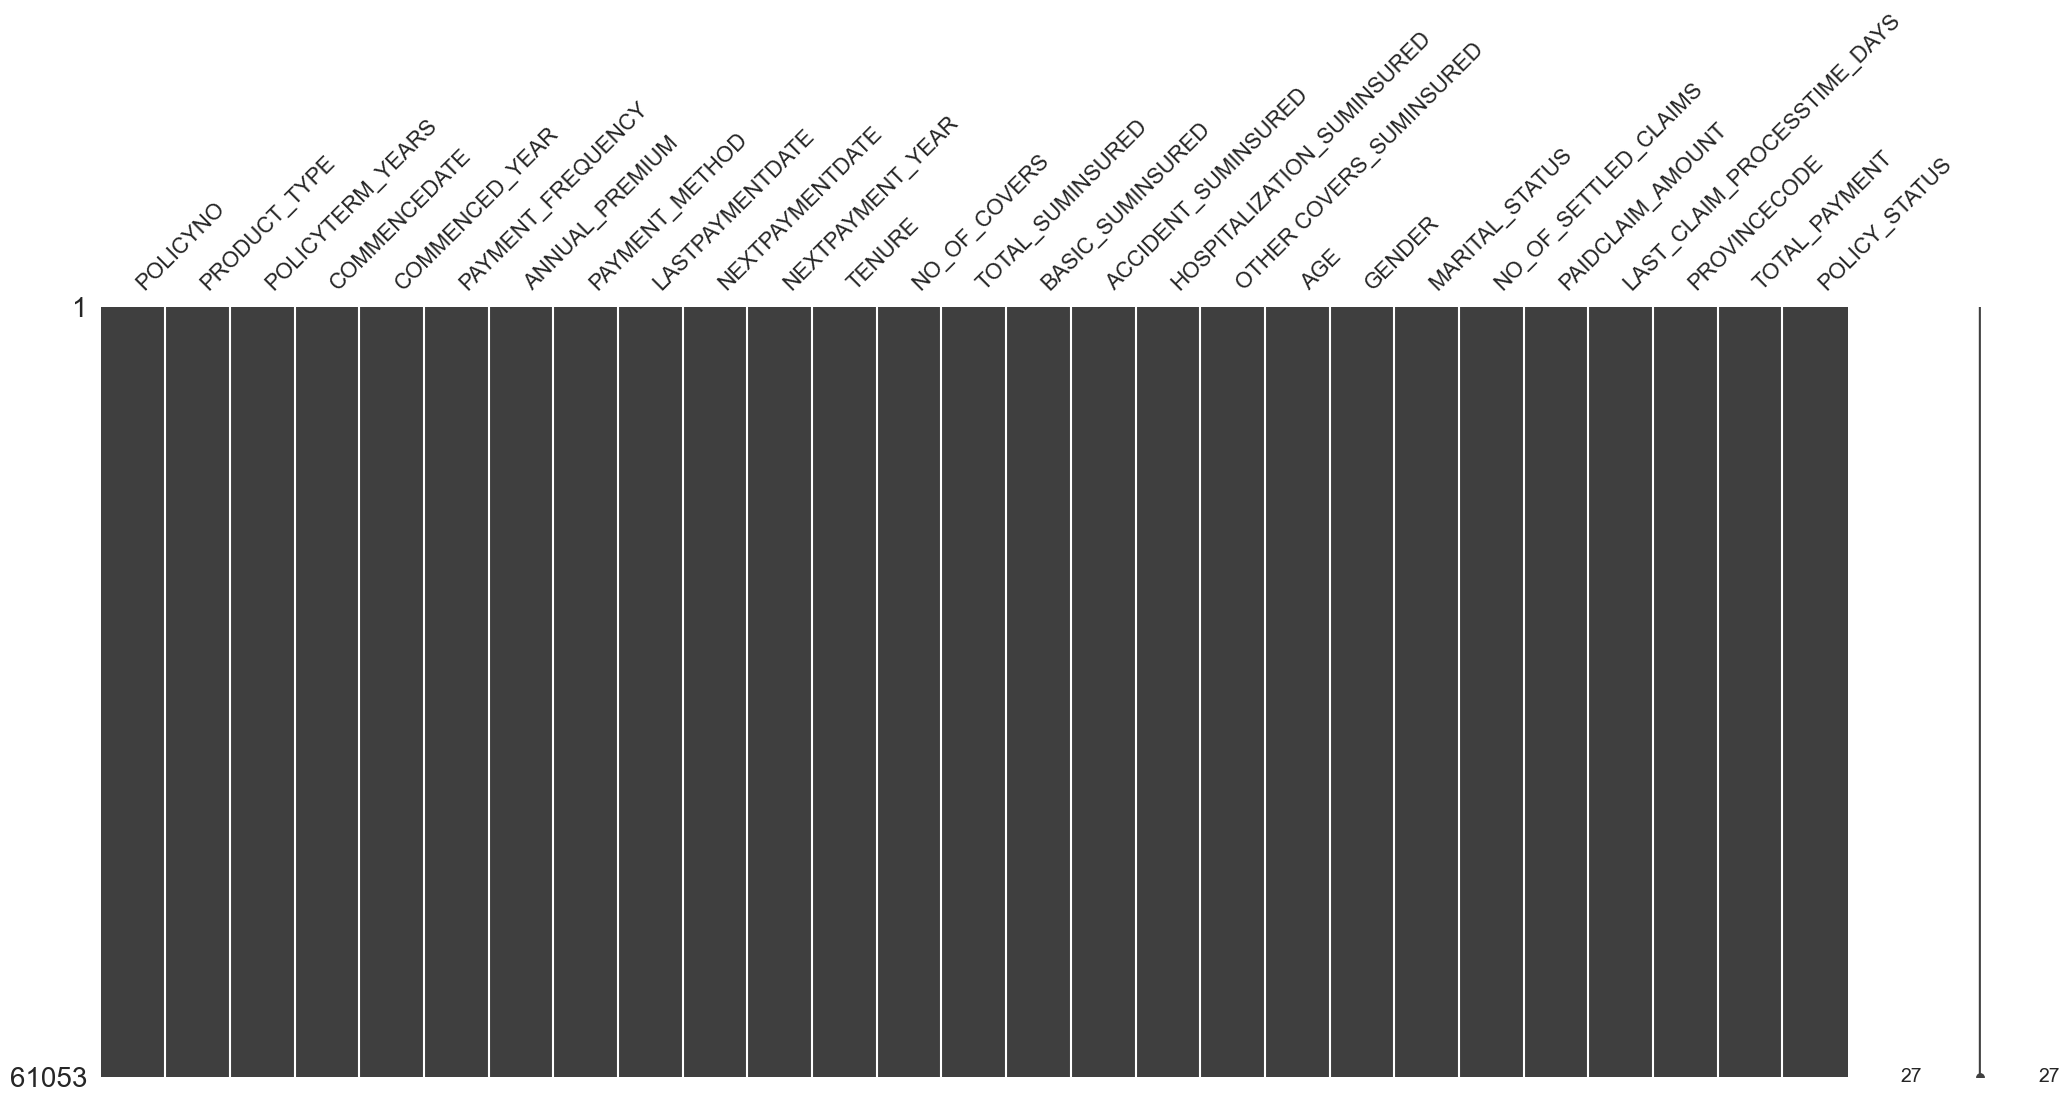

In [440]:
#Visualize Missing Values
msno.matrix(df1)


In [441]:
df1.isnull().any().any()

False

In [442]:
df1.isnull().sum()

POLICYNO                       0
PRODUCT_TYPE                   0
POLICYTERM_YEARS               0
COMMENCEDATE                   0
COMMENCED_YEAR                 0
PAYMENT_FREQUENCY              0
ANNUAL_PREMIUM                 0
PAYMENT_METHOD                 0
LASTPAYMENTDATE                0
NEXTPAYMENTDATE                0
NEXTPAYMENT_YEAR               0
TENURE                         0
NO_OF_COVERS                   0
TOTAL_SUMINSURED               0
BASIC_SUMINSURED               0
ACCIDENT_SUMINSURED            0
HOSPITALIZATION_SUMINSURED     0
OTHER COVERS_SUMINSURED        0
AGE                            0
GENDER                         0
MARITAL_STATUS                 0
NO_OF_SETTLED_CLAIMS           0
PAIDCLAIM_AMOUNT               0
LAST_CLAIM_PROCESSTIME_DAYS    0
PROVINCECODE                   0
TOTAL_PAYMENT                  0
POLICY_STATUS                  0
dtype: int64

In [443]:
#Checking Duplicates

print('Known observations: {}\nUnique observations: {}'.format(len(df1.index),len(df1.drop_duplicates().index)))

print("**No duplicates Found!**")

Known observations: 61053
Unique observations: 61053
**No duplicates Found!**


In [444]:
df1 = df1.drop(["COMMENCEDATE","LASTPAYMENTDATE","NEXTPAYMENTDATE","PROVINCECODE"], axis = 1)
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,NEXTPAYMENT_YEAR,TENURE,NO_OF_COVERS,...,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS,TOTAL_PAYMENT,POLICY_STATUS
0,NJEV2018-453,ENDOW,49,2018,M,24732,CASH,2018,3,1,...,0,0,32,M,M,0,0,0,6183,LAPSE
1,NJEV2018-2541,ENDOW,49,2018,M,24732,CASH,2018,1,1,...,0,0,32,M,M,0,0,0,2061,LAPSE
2,NJEV2018-1209,ENDOW,49,2018,M,24732,CASH,2018,1,1,...,0,0,32,M,M,0,0,0,2061,LAPSE
3,NJEV2018-1378,ENDOW,49,2018,M,24732,CASH,2020,21,1,...,0,0,32,F,M,0,0,0,43281,LAPSE
4,NJEV2018-1853,ENDOW,49,2018,M,24732,CASH,2018,1,1,...,0,0,32,M,M,0,0,0,2061,LAPSE


In [445]:

# Group the data by POLICY_STATUS and count occurrences

policy_status_counts = df1['POLICY_STATUS'].value_counts()
percentage = (policy_status_counts / policy_status_counts.sum()) * 100
policy_status_summary = pd.DataFrame({'Count': policy_status_counts, 'Percentage': percentage})

policy_status_summary.rename(columns={'index': 'POLICY_STATUS'}, inplace=True)
policy_status_summary.sort_values(by='Count', ascending=True, inplace=True)

print(policy_status_summary)


               Count  Percentage
POLICY_STATUS                   
ACTIVE         12489   20.455997
LAPSE          48564   79.544003


In [446]:
catagorical = [i for i in df1.columns if df1[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', df1[i].unique())

POLICYNO : ['NJEV2018-453' 'NJEV2018-2541' 'NJEV2018-1209' ... 'NGT022018-97'
 'JCA012018-552' 'JCA012018-25']
PRODUCT_TYPE : ['ENDOW' 'UL']
PAYMENT_FREQUENCY : ['M' 'A' 'Q' 'H']
PAYMENT_METHOD : ['CASH' 'STANDING ORDER' 'DIGITAL PAYMENT']
GENDER : ['M' 'F']
MARITAL_STATUS : ['M' 'S']
POLICY_STATUS : ['LAPSE' 'ACTIVE']


In [447]:
df1.describe(include=['object']).T

,count,unique,top,freq
POLICYNO,61053,61053,NJEV2018-453,1
PRODUCT_TYPE,61053,2,ENDOW,40348
PAYMENT_FREQUENCY,61053,4,M,47692
PAYMENT_METHOD,61053,3,CASH,50774
GENDER,61053,2,M,35626
MARITAL_STATUS,61053,2,M,44881
POLICY_STATUS,61053,2,LAPSE,48564


In [448]:
# Shows statistical summaries for all numeric columns
df1.describe()

,POLICYTERM_YEARS,COMMENCED_YEAR,ANNUAL_PREMIUM,NEXTPAYMENT_YEAR,TENURE,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS,TOTAL_PAYMENT
count,61053.000000,61053.000000,61053.000000,61053.000000,61053.000000,61053.000000,6.105300e+04,6.105300e+04,6.105300e+04,6.105300e+04,6.105300e+04,61053.000000,61053.000000,6.105300e+04,61053.000000,6.105300e+04
mean,24.302688,2020.254861,60192.456571,2021.087449,10.622738,3.023406,2.689394e+06,8.278353e+05,1.063666e+06,4.427230e+05,3.551704e+05,36.004275,0.030842,1.292088e+03,0.426859,5.443648e+04
std,12.075421,1.424578,29855.757595,1.633569,14.204508,1.309676,2.114686e+06,6.153142e+05,1.163788e+06,4.707037e+05,5.048563e+05,10.515093,0.251931,1.857130e+04,6.735705,8.523153e+04
min,5.000000,2018.000000,12024.000000,2018.000000,1.000000,1.000000,2.000000e+05,4.068000e+03,0.000000e+00,0.000000e+00,0.000000e+00,18.000000,0.000000,0.000000e+00,0.000000,1.504000e+03
25%,16.000000,2019.000000,35556.000000,2020.000000,1.000000,1.000000,8.400000e+05,4.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,28.000000,0.000000,0.000000e+00,0.000000,6.405000e+03
50%,20.000000,2021.000000,56448.000000,2021.000000,5.000000,4.000000,2.235000e+06,6.200000e+05,9.000000e+05,3.600000e+05,2.000000e+05,35.000000,0.000000,0.000000e+00,0.000000,2.092600e+04
75%,30.000000,2021.000000,75272.000000,2022.000000,12.000000,4.000000,3.936352e+06,1.020340e+06,1.600000e+06,6.700000e+05,5.000000e+05,43.000000,0.000000,0.000000e+00,0.000000,6.387000e+04
max,49.000000,2022.000000,150000.000000,2029.000000,120.000000,6.000000,1.000000e+07,6.192784e+06,7.200000e+06,5.400000e+06,7.100000e+06,87.000000,20.000000,1.605000e+06,1190.000000,1.017500e+06


In [449]:

type_ = ["LAPSE", "ACTIVE"]
fig = make_subplots(rows=1, cols=1)

# Define custom colors
custom_colors = ['#EF553B', '#636EFA']  # You can change these colors as needed

# Create the figure and pie chart
fig = go.Figure()

# Add a Pie trace with data labels and custom colors
fig.add_trace(go.Pie(
    labels=type_,
    values=df1['POLICY_STATUS'].value_counts(),
    name="POLICY_STATUS",
    textinfo='label+percent',
    marker=dict(colors=custom_colors),
))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.4, textfont_size=12)

fig.update_layout(
    title_text="Active vs Lapse Policy Distribution",
    title_x=0.55,
    title_y=0.90,
    annotations=[dict(text='POLICY STATUS', x=0.5, y=-0.1, font_size=12, showarrow=False)],
    
    # Move the legend to the bottom
    legend=dict(x=0.4, y=-0.3),

    # Reduce chart size by setting height and width
    height=400,
    width=550,
)

fig.show()

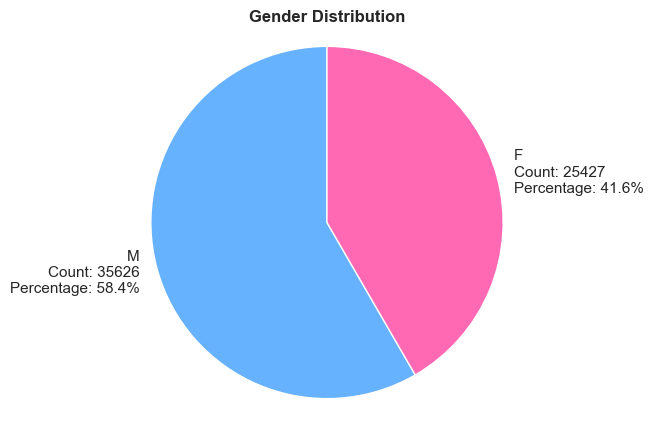

In [450]:
# Calculate gender counts
gender_counts = df1['GENDER'].value_counts()

# Calculate percentages
total_count = len(df1)
gender_percentages = (gender_counts / total_count) * 100

# Define custom colors
custom_colors = ['#66B2FF', 'hotpink']  # Custom colors for Male and Female

# Create pie chart labels with gender, count, and percentage
labels = gender_counts.index
labels_with_info = [f"{gender}\nCount: {count}\nPercentage: {percentage:.1f}%" for gender, count, percentage in zip(labels, gender_counts, gender_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Gender Distribution",fontweight='bold')

# Display the chart
plt.axis('equal')
plt.show()

In [451]:
df1.POLICY_STATUS.groupby(by = df1.GENDER).count()

GENDER
F    25427
M    35626
Name: POLICY_STATUS, dtype: int64

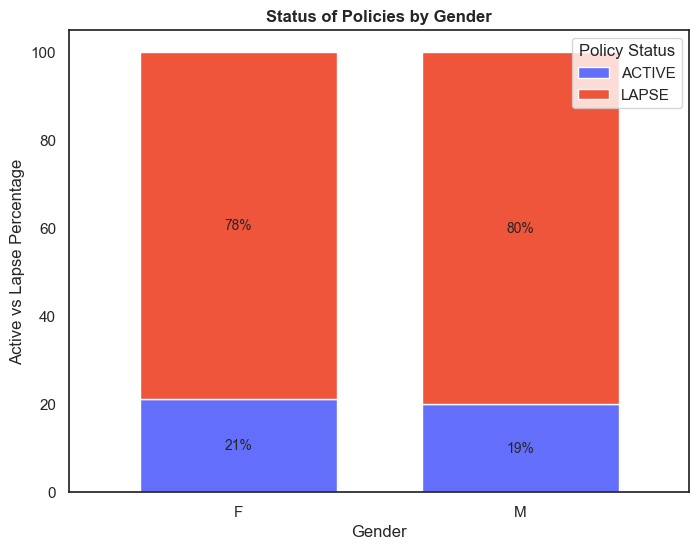

In [452]:
# Group the data by 'GENDER' and 'POLICY_STATUS' and count the number of policies in each group
grouped = df1.groupby(['GENDER', 'POLICY_STATUS']).size().unstack(fill_value=0)

# Calculate the total count of policies for each gender
total_counts = grouped.sum(axis=1)

# Calculate the percentages
percentage_grouped = grouped.div(total_counts, axis=0) * 100

# Define custom colors for each policy status
custom_colors = {
    'ACTIVE': '#636EFA',
    'LAPSE': '#EF553B'
}

# Create the stacked bar chart with custom colors
ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(8, 6), color=[custom_colors.get(col, '#A9A9A9') for col in percentage_grouped.columns], width=0.7)

# Add data labels and percentages to each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.title('Status of Policies by Gender',fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Active vs Lapse Percentage')

# Move the legend to the bottom
plt.legend(title='Policy Status', loc='upper right')

plt.xticks(rotation=0)

plt.show()

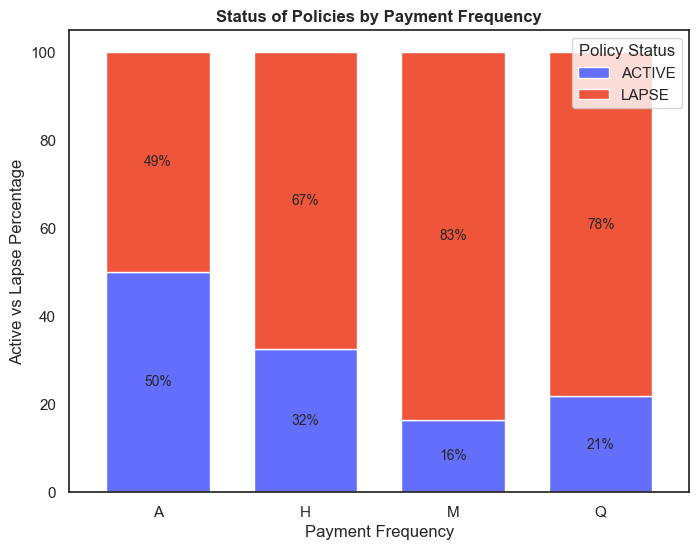

In [453]:

# Group the data by 'PAYMENT_FREQUENCY' and 'POLICY_STATUS' and count the number of policies in each group
grouped = df1.groupby(['PAYMENT_FREQUENCY', 'POLICY_STATUS']).size().unstack(fill_value=0)

# Calculate the total count of policies for each payment frequency
total_counts = grouped.sum(axis=1)

# Calculate the percentages
percentage_grouped = grouped.div(total_counts, axis=0) * 100

# Define custom colors for each policy status
custom_colors = {
    'ACTIVE': '#636EFA',
    'LAPSE': '#EF553B'
}

# Create the stacked bar chart with custom colors
ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(8, 6), color=[custom_colors.get(col, '#A9A9A9') for col in percentage_grouped.columns], width=0.7)

# Add data labels and percentages to each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.title('Status of Policies by Payment Frequency',fontweight='bold')
plt.xlabel('Payment Frequency')
plt.ylabel('Active vs Lapse Percentage')

# Move the legend to the bottom
plt.legend(title='Policy Status', loc='upper right')

plt.xticks(rotation=0)

plt.show()

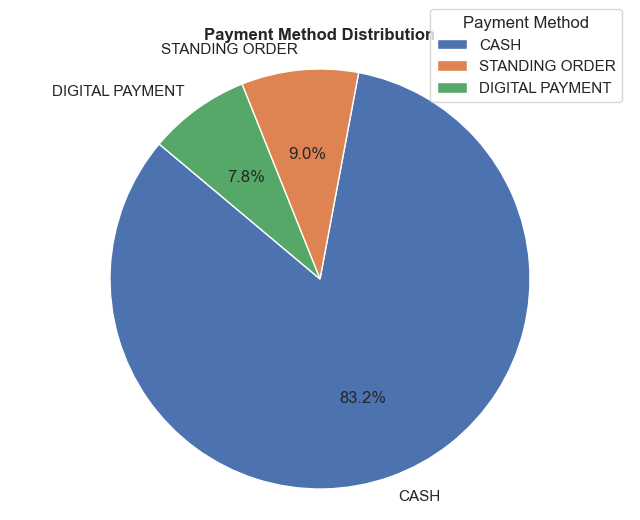

In [454]:
# Group the data by 'PAYMENT_METHOD' and count the number of occurrences for each method
payment_method_counts = df1['PAYMENT_METHOD'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution',fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(payment_method_counts.index, title='Payment Method', loc='upper right',bbox_to_anchor=(1, 1.1))

plt.show()

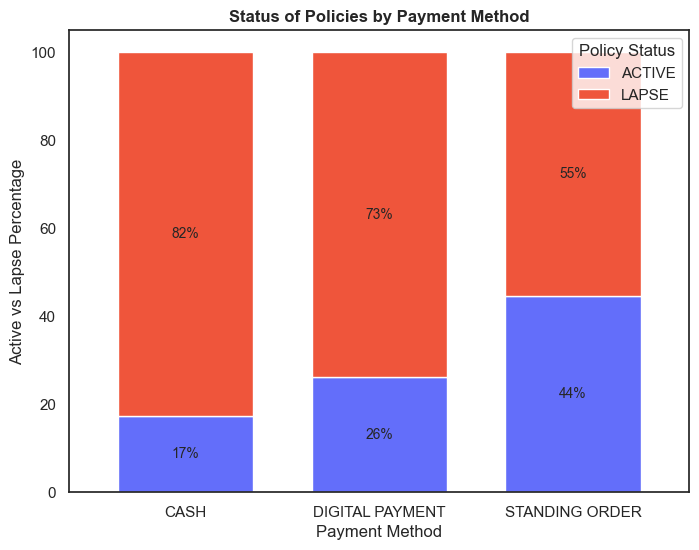

In [455]:
# Group the data by 'PAYMENT_METHOD' and 'POLICY_STATUS' and count the number of policies in each group
grouped = df1.groupby(['PAYMENT_METHOD', 'POLICY_STATUS']).size().unstack(fill_value=0)

# Calculate the total count of policies for each payment method
total_counts = grouped.sum(axis=1)

# Calculate the percentages
percentage_grouped = grouped.div(total_counts, axis=0) * 100

# Define custom colors for each policy status
custom_colors = {
    'ACTIVE': '#636EFA',
    'LAPSE': '#EF553B'
}

# Create the stacked bar chart with percentages
ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(8, 6),width=0.7,color=[custom_colors.get(col, '#A9A9A9') for col in percentage_grouped.columns])

# Add data labels and percentages to each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.title('Status of Policies by Payment Method',fontweight='bold')
plt.xlabel('Payment Method')
plt.ylabel('Active vs Lapse Percentage')
plt.legend(title='Policy Status', loc='upper right')
plt.xticks(rotation=0)

plt.show()

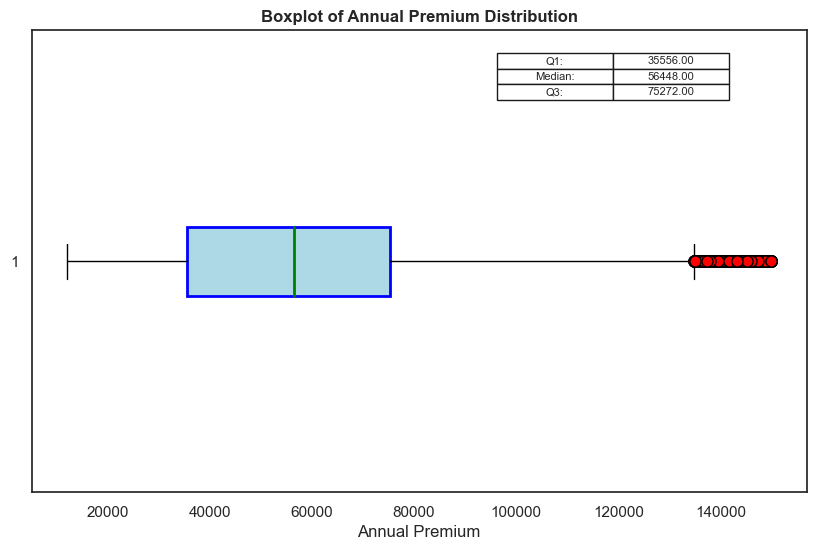

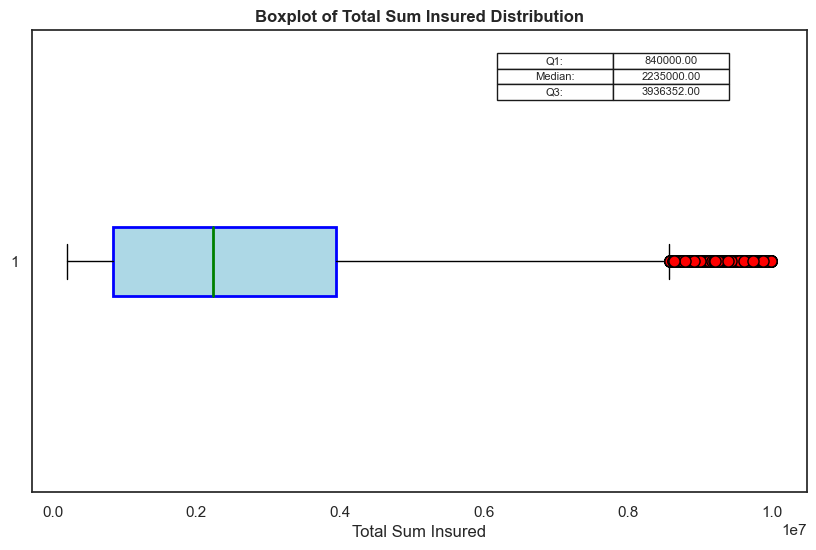

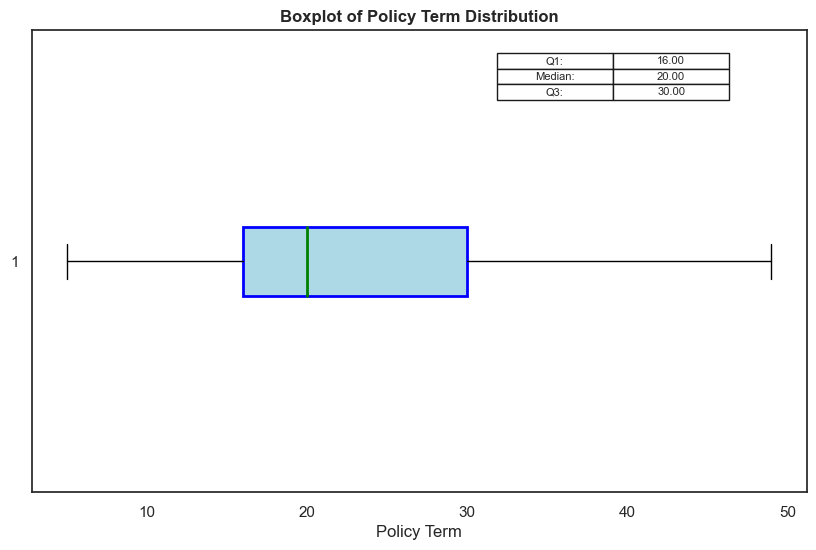

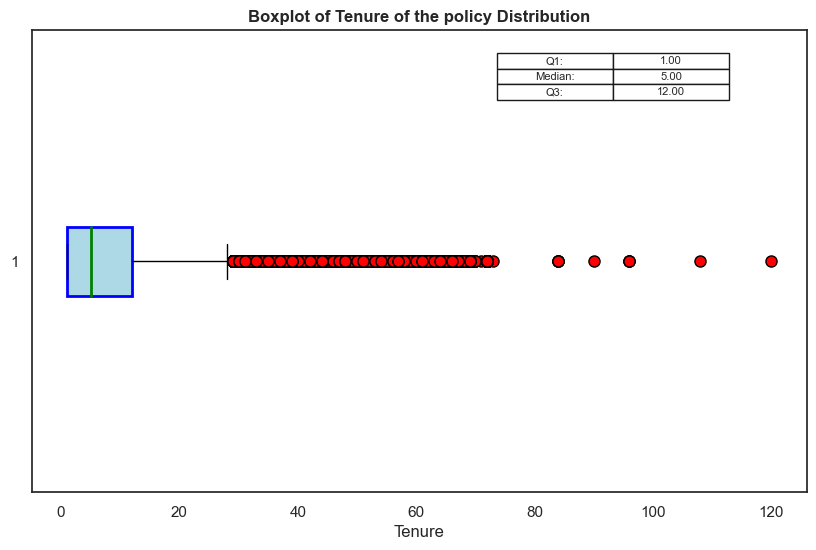

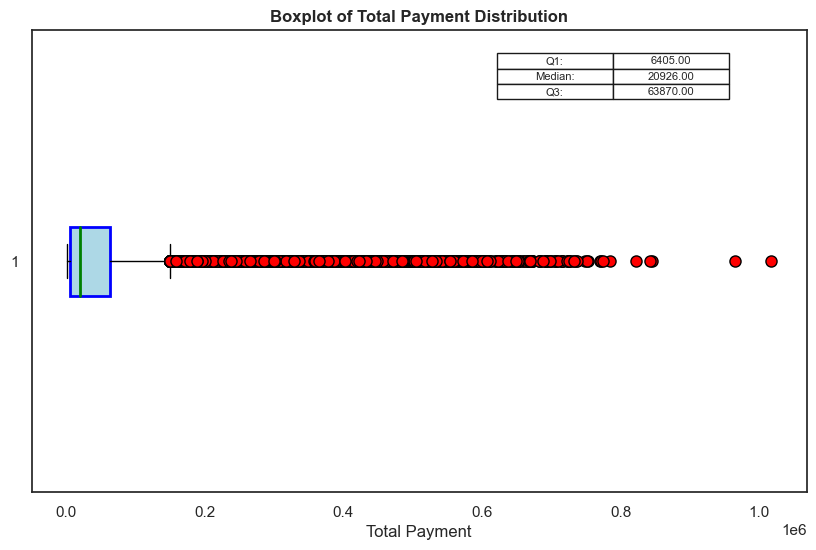

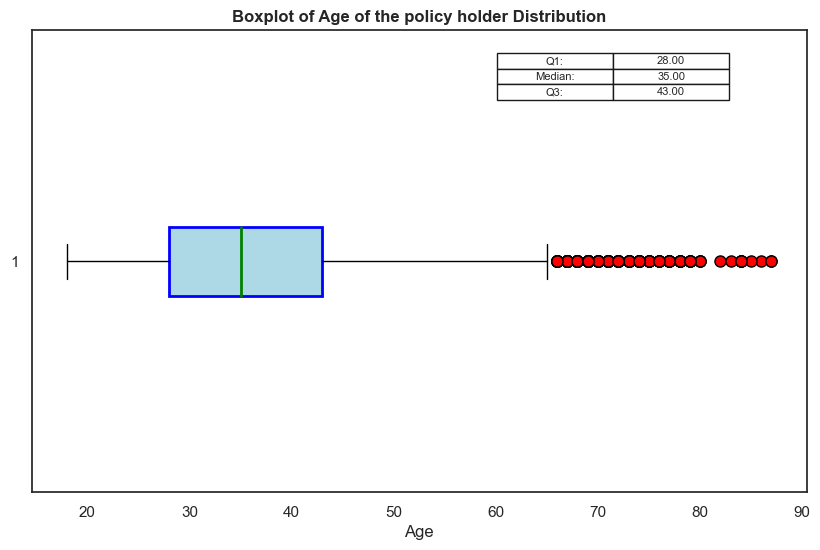

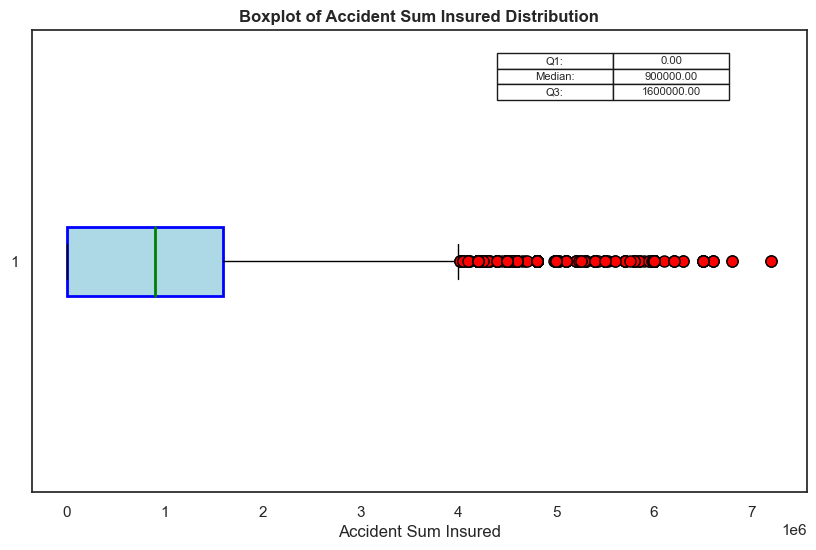

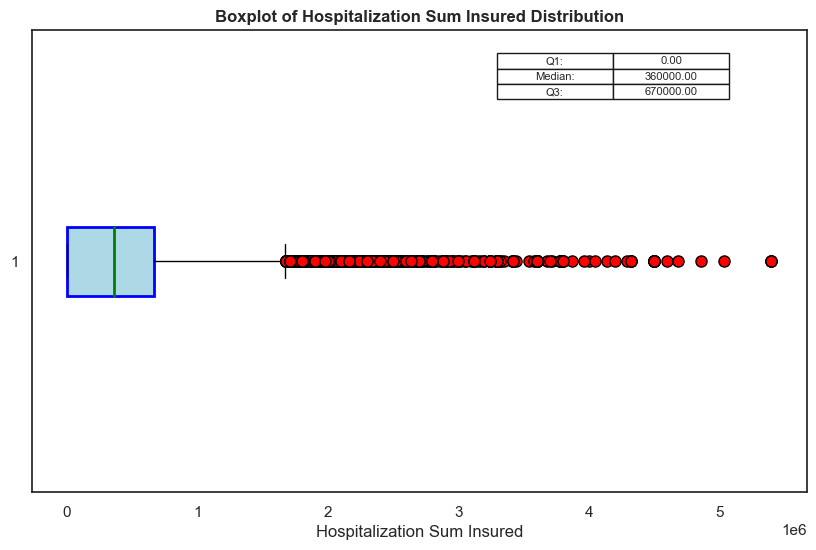

In [456]:
def create_custom_boxplot(data, title, x_label):
    # Set custom styles for boxplot elements
    boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
    medianprops = dict(linestyle='-', linewidth=2, color='green')

    # Create the boxplot
    fig, ax = plt.subplots(figsize=(10, 6))
    boxplot = ax.boxplot(data, vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    # Add title and axis labels
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label)

    # Calculate quartile values
    quartiles = np.percentile(data, [25, 50, 75])
    q1, median, q3 = quartiles[0], quartiles[1], quartiles[2]

    # Create a table to display quartile values
    table_data = [['Q1:', f'{q1:.2f}'],
                  ['Median:', f'{median:.2f}'],
                  ['Q3:', f'{q3:.2f}']]

    # Adjust the bbox parameter to move the table to the top right corner
    table = ax.table(cellText=table_data, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    plt.show()

# Example usage:
# Pass your data, title, and x-axis label to the function
create_custom_boxplot(df1['ANNUAL_PREMIUM'], 'Boxplot of Annual Premium Distribution', 'Annual Premium')
create_custom_boxplot(df1['TOTAL_SUMINSURED'], 'Boxplot of Total Sum Insured Distribution', 'Total Sum Insured')
create_custom_boxplot(df1['POLICYTERM_YEARS'], 'Boxplot of Policy Term Distribution', 'Policy Term')
create_custom_boxplot(df1['TENURE'], 'Boxplot of Tenure of the policy Distribution', 'Tenure')
create_custom_boxplot(df1['TOTAL_PAYMENT'], 'Boxplot of Total Payment Distribution', 'Total Payment')
create_custom_boxplot(df1['AGE'], 'Boxplot of Age of the policy holder Distribution', 'Age')
create_custom_boxplot(df1['ACCIDENT_SUMINSURED'], 'Boxplot of Accident Sum Insured Distribution', 'Accident Sum Insured')
create_custom_boxplot(df1['HOSPITALIZATION_SUMINSURED'], 'Boxplot of Hospitalization Sum Insured Distribution', 'Hospitalization Sum Insured')

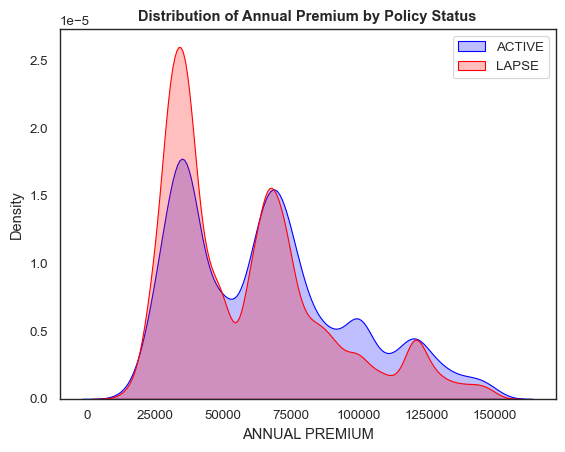

In [457]:
#Density Plot of Annual Premium

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.ANNUAL_PREMIUM[(df1["POLICY_STATUS"] == 'ACTIVE') ],
                color="Blue", fill = True);
ax = sns.kdeplot(df1.ANNUAL_PREMIUM[(df1["POLICY_STATUS"] == 'LAPSE') ],
                ax =ax, color="Red", fill= True);
ax.legend(["ACTIVE","LAPSE"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('ANNUAL PREMIUM');
ax.set_title('Distribution of Annual Premium by Policy Status',fontweight='bold');

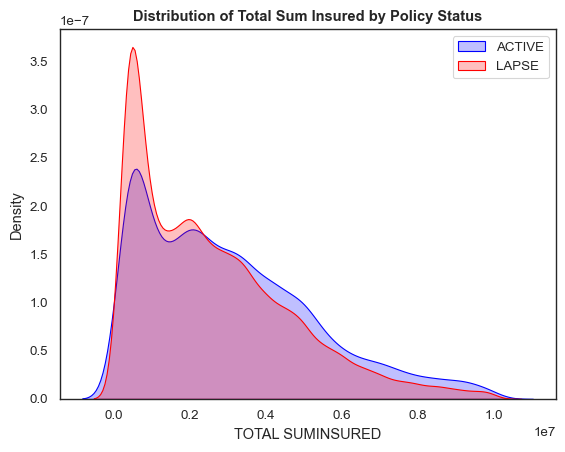

In [458]:
#Density Plot of Total Sum Insured

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.TOTAL_SUMINSURED[(df1["POLICY_STATUS"] == 'ACTIVE') ],
                color="Blue", fill = True);
ax = sns.kdeplot(df1.TOTAL_SUMINSURED[(df1["POLICY_STATUS"] == 'LAPSE') ],
                ax =ax, color="Red", fill= True);
ax.legend(["ACTIVE","LAPSE"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('TOTAL SUMINSURED');
ax.set_title('Distribution of Total Sum Insured by Policy Status',fontweight='bold');

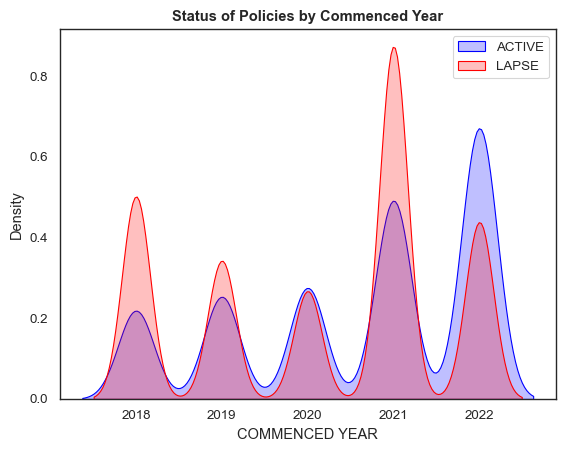

In [459]:
#Density Plot of Status of Policies by Commenced Year

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.COMMENCED_YEAR[(df1["POLICY_STATUS"] == 'ACTIVE') ],
                color="Blue", fill = True);
ax = sns.kdeplot(df1.COMMENCED_YEAR[(df1["POLICY_STATUS"] == 'LAPSE') ],
                ax =ax, color="Red", fill= True);
ax.legend(["ACTIVE","LAPSE"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('COMMENCED YEAR');
ax.set_title('Status of Policies by Commenced Year',fontweight='bold');

In [460]:
# Select categorical variables (object or category dtype)
categorical_vars = df1.select_dtypes(include=['object', 'category'])

# Select numerical variables (int or float dtype)
numerical_vars = df1.select_dtypes(include=['int', 'float'])

# Example of printing the lists of variables
print("Categorical Variables:")
print(categorical_vars.columns.tolist())

print("\nNumerical Variables:")
print(numerical_vars.columns.tolist())

Categorical Variables:
['POLICYNO', 'PRODUCT_TYPE', 'PAYMENT_FREQUENCY', 'PAYMENT_METHOD', 'GENDER', 'MARITAL_STATUS', 'POLICY_STATUS']

Numerical Variables:
['POLICYTERM_YEARS', 'COMMENCED_YEAR', 'ANNUAL_PREMIUM', 'NEXTPAYMENT_YEAR', 'TENURE', 'NO_OF_COVERS', 'TOTAL_SUMINSURED', 'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED', 'AGE', 'NO_OF_SETTLED_CLAIMS', 'PAIDCLAIM_AMOUNT', 'LAST_CLAIM_PROCESSTIME_DAYS', 'TOTAL_PAYMENT']


In [461]:
#Chi squared test & Cramer's V for Product type and Policy Status

# Create a contingency table
ct1 = pd.crosstab(df1['PRODUCT_TYPE'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct1)

# Calculate Cramer's V
n1 = ct1.sum().sum()
C1, R1 = ct1.shape[1], ct1.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n1 * min(C1 - 1, R1 - 1)))

# Print the results
print(ct1)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS  ACTIVE  LAPSE
PRODUCT_TYPE                
ENDOW            7176  33172
UL               5313  15392
Chi-Squared Test Statistic: 521.0534073020917
P-Value: 2.4966612789981963e-115
Cramer's V: 0.09238205433673718


In [462]:
#Chi squared test & Cramer's V for Payment Frequency and Policy Status

# Create a contingency table
ct2 = pd.crosstab(df1['PAYMENT_FREQUENCY'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct2)

# Calculate Cramer's V
n2 = ct2.sum().sum()
C2, R2 = ct2.shape[1], ct2.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n2 * min(C2 - 1, R2 - 1)))

# Print the results
print(ct2)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS      ACTIVE  LAPSE
PAYMENT_FREQUENCY               
A                    2725   2724
H                     693   1434
M                    7811  39881
Q                    1260   4525
Chi-Squared Test Statistic: 3610.6507829029574
P-Value: 0.0
Cramer's V: 0.2431863747067014


In [463]:
#Chi squared test & Cramer's V for Payment Method and Policy Status

# Create a contingency table
ct3 = pd.crosstab(df1['PAYMENT_METHOD'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct3)

# Calculate Cramer's V
n3 = ct3.sum().sum()
C3, R3 = ct3.shape[1], ct3.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n3 * min(C3 - 1, R3 - 1)))

# Print the results
print(ct3)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS    ACTIVE  LAPSE
PAYMENT_METHOD                
CASH               8790  41984
DIGITAL PAYMENT    1249   3532
STANDING ORDER     2450   3048
Chi-Squared Test Statistic: 2366.2733018218837
P-Value: 0.0
Cramer's V: 0.1968697307576842


In [464]:
#Chi squared test & Cramer's V for Gender and Policy Status

# Create a contingency table
ct4 = pd.crosstab(df1['GENDER'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct4)

# Calculate Cramer's V
n4 = ct4.sum().sum()
C4, R4 = ct4.shape[1], ct4.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n4 * min(C4 - 1, R4 - 1)))

# Print the results
print(ct4)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS  ACTIVE  LAPSE
GENDER                      
F                5384  20043
M                7105  28521
Chi-Squared Test Statistic: 13.74333539333008
P-Value: 0.00020956304396559713
Cramer's V: 0.015003499498056514


In [465]:
#Chi squared test & Cramer's V for Marital Status and Policy Status

# Create a contingency table
ct5 = pd.crosstab(df1['MARITAL_STATUS'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct5)

# Calculate Cramer's V
n5 = ct5.sum().sum()
C5, R5 = ct5.shape[1], ct5.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n5 * min(C5 - 1, R5 - 1)))

# Print the results
print(ct5)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS   ACTIVE  LAPSE
MARITAL_STATUS               
M                 9344  35537
S                 3145  13027
Chi-Squared Test Statistic: 13.67502342815789
P-Value: 0.00021732578606004234
Cramer's V: 0.014966165208974579


In [466]:
def point_biserial_correlation(iv, dv):
    """Calculates the point-biserial correlation between two variables.

    Args:
      iv: Independent Variable.
      dv: Dependent Variable.

    Returns:
      The point-biserial correlation coefficient.
    """
    
    # Calculate the mean of 'ANNUAL_PREMIUM' for 'LAPSE' policies
    mean_X1 = np.mean(iv[dv == 'LAPSE'])
    
    # Calculate the mean of 'ANNUAL_PREMIUM' for 'ACTIVE' policies
    mean_X0 = np.mean(iv[dv == 'ACTIVE'])
    
    # Calculate the overall standard deviation of 'ANNUAL_PREMIUM'
    std_X = np.std(iv)
    
    # Calculate the point-biserial correlation coefficient
    point_biserial_correlation = (mean_X1 - mean_X0) / std_X
    
    return point_biserial_correlation


# Extract the Independent and Dependent Variables

iv1 = df1['ANNUAL_PREMIUM']
iv2 = df1['POLICYTERM_YEARS']
iv3 = df1['TOTAL_SUMINSURED']
iv4 = df1['TENURE']
iv5 = df1['NO_OF_COVERS']
iv6 = df1['TOTAL_PAYMENT']
iv7 = df1['AGE']
dv1 = df1['POLICY_STATUS']


# Calculate the point-biserial correlation coefficient.
point_biserial_corr_1 = point_biserial_correlation(iv1, dv1)
point_biserial_corr_2 = point_biserial_correlation(iv2, dv1)
point_biserial_corr_3 = point_biserial_correlation(iv3, dv1)
point_biserial_corr_4 = point_biserial_correlation(iv4, dv1)
point_biserial_corr_5 = point_biserial_correlation(iv5, dv1)
point_biserial_corr_6 = point_biserial_correlation(iv6, dv1)
point_biserial_corr_7 = point_biserial_correlation(iv7, dv1)

# Print the point-biserial correlation coefficient.
print(f"Point-Biserial Correlation Coefficient between Annual Premium and Policy Status: {point_biserial_corr_1}")
print(f"Point-Biserial Correlation Coefficient between Policy Term and Policy Status: {point_biserial_corr_2}")
print(f"Point-Biserial Correlation Coefficient between Total Sum Insured and Policy Status: {point_biserial_corr_3}")
print(f"Point-Biserial Correlation Coefficient between Tenure and Policy Status: {point_biserial_corr_4}")
print(f"Point-Biserial Correlation Coefficient between No of covers and Policy Status: {point_biserial_corr_5}")
print(f"Point-Biserial Correlation Coefficient between Total Payment and Policy Status: {point_biserial_corr_6}")
print(f"Point-Biserial Correlation Coefficient between Age and Policy Status: {point_biserial_corr_7}")



Point-Biserial Correlation Coefficient between Annual Premium and Policy Status: -0.23598687238435112
Point-Biserial Correlation Coefficient between Policy Term and Policy Status: 0.10983950925141528
Point-Biserial Correlation Coefficient between Total Sum Insured and Policy Status: -0.20528125494173266
Point-Biserial Correlation Coefficient between Tenure and Policy Status: -1.751354610801879
Point-Biserial Correlation Coefficient between No of covers and Policy Status: -0.12787195209867447
Point-Biserial Correlation Coefficient between Total Payment and Policy Status: -1.5473669511460013
Point-Biserial Correlation Coefficient between Age and Policy Status: -0.24504044288393964


In [467]:
#Label Encoding for columns with 2 or less unique

df2 = df1.copy()

#Encoding Gender as Male=1 and Female=0
df2.GENDER = [1 if x == "M" else 0 for x in df2.GENDER]

#Encoding Marital Status as Married=1 and Unmarried=0
df2.MARITAL_STATUS = [1 if x == "M" else 0 for x in df2.MARITAL_STATUS]

#Encoding Product Type as ENDOW=1 and UL=0
df2.PRODUCT_TYPE = [1 if x == "ENDOW" else 0 for x in df2.PRODUCT_TYPE]

#Encoding Policy Status as Lapse=1 and Active=0
df2.POLICY_STATUS = [1 if x == "LAPSE" else 0 for x in df2.POLICY_STATUS]

In [468]:
df2.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,NEXTPAYMENT_YEAR,TENURE,NO_OF_COVERS,...,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS,TOTAL_PAYMENT,POLICY_STATUS
0,NJEV2018-453,1,49,2018,M,24732,CASH,2018,3,1,...,0,0,32,1,1,0,0,0,6183,1
1,NJEV2018-2541,1,49,2018,M,24732,CASH,2018,1,1,...,0,0,32,1,1,0,0,0,2061,1
2,NJEV2018-1209,1,49,2018,M,24732,CASH,2018,1,1,...,0,0,32,1,1,0,0,0,2061,1
3,NJEV2018-1378,1,49,2018,M,24732,CASH,2020,21,1,...,0,0,32,0,1,0,0,0,43281,1
4,NJEV2018-1853,1,49,2018,M,24732,CASH,2018,1,1,...,0,0,32,1,1,0,0,0,2061,1


In [469]:
#Check the remaining categorical variables

catagorical = [i for i in df2.columns if df2[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', df2[i].unique())

POLICYNO : ['NJEV2018-453' 'NJEV2018-2541' 'NJEV2018-1209' ... 'NGT022018-97'
 'JCA012018-552' 'JCA012018-25']
PAYMENT_FREQUENCY : ['M' 'A' 'Q' 'H']
PAYMENT_METHOD : ['CASH' 'STANDING ORDER' 'DIGITAL PAYMENT']


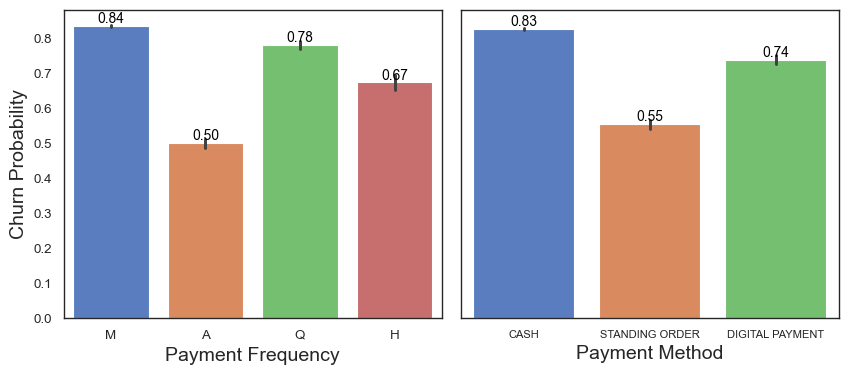

In [470]:
#Checking whether the remaining two caregorical variables can be imputed by considered as ordinal

df2 = df2.replace(regex=r'\s\(automatic\)', value='')

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

g1 = sns.barplot(ax=axes[0], x="PAYMENT_FREQUENCY",y="POLICY_STATUS",data=df2, palette="muted")
g1.set_xlabel("Payment Frequency", fontsize=14)
g1.set_ylabel("Churn Probability", fontsize=14)

g2 = sns.barplot(ax=axes[1], x="PAYMENT_METHOD",y="POLICY_STATUS",data=df2, palette="muted")
g2.set_xlabel("Payment Method", fontsize=14)
g2.set_ylabel('')
g2.set_xticklabels(labels=df2.PAYMENT_METHOD.unique(), fontsize=8)

# Function to add data labels to the bars
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Add data labels to the first bar plot
add_data_labels(g1)

# Add data labels to the second bar plot
add_data_labels(g2)

In [471]:
# generate the list of categorical and numerical variables
categorical_2 = df2.nunique()[df2.nunique() < 5].keys().to_list()
categorical_2

['PRODUCT_TYPE',
 'PAYMENT_FREQUENCY',
 'PAYMENT_METHOD',
 'GENDER',
 'MARITAL_STATUS',
 'POLICY_STATUS']

In [472]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61053 entries, 0 to 61052
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   POLICYNO                     61053 non-null  object
 1   PRODUCT_TYPE                 61053 non-null  int64 
 2   POLICYTERM_YEARS             61053 non-null  int64 
 3   COMMENCED_YEAR               61053 non-null  int64 
 4   PAYMENT_FREQUENCY            61053 non-null  object
 5   ANNUAL_PREMIUM               61053 non-null  int64 
 6   PAYMENT_METHOD               61053 non-null  object
 7   NEXTPAYMENT_YEAR             61053 non-null  int64 
 8   TENURE                       61053 non-null  int64 
 9   NO_OF_COVERS                 61053 non-null  int64 
 10  TOTAL_SUMINSURED             61053 non-null  int64 
 11  BASIC_SUMINSURED             61053 non-null  int64 
 12  ACCIDENT_SUMINSURED          61053 non-null  int64 
 13  HOSPITALIZATION_SUMINSURED   61

In [473]:
# Define the columns you want to one-hot encode
columns_to_encode = ['PAYMENT_FREQUENCY', 'PAYMENT_METHOD']

# Use Pandas' get_dummies function to perform one-hot encoding
dfe1 = pd.get_dummies(df2, columns=columns_to_encode)

columns_to_convert=['PAYMENT_FREQUENCY_A','PAYMENT_FREQUENCY_H','PAYMENT_FREQUENCY_Q','PAYMENT_FREQUENCY_M','PAYMENT_METHOD_CASH','PAYMENT_METHOD_DIGITAL PAYMENT','PAYMENT_METHOD_STANDING ORDER']

dfe1[columns_to_convert] = dfe1[columns_to_convert].astype(int)

In [474]:
dfe1 = dfe1.drop(["POLICYNO"], axis = 1)
dfe1.head()

,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,ANNUAL_PREMIUM,NEXTPAYMENT_YEAR,TENURE,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,...,LAST_CLAIM_PROCESSTIME_DAYS,TOTAL_PAYMENT,POLICY_STATUS,PAYMENT_FREQUENCY_A,PAYMENT_FREQUENCY_H,PAYMENT_FREQUENCY_M,PAYMENT_FREQUENCY_Q,PAYMENT_METHOD_CASH,PAYMENT_METHOD_DIGITAL PAYMENT,PAYMENT_METHOD_STANDING ORDER
0,1,49,2018,24732,2018,3,1,500000,500000,0,...,0,6183,1,0,0,1,0,1,0,0
1,1,49,2018,24732,2018,1,1,500000,500000,0,...,0,2061,1,0,0,1,0,1,0,0
2,1,49,2018,24732,2018,1,1,500000,500000,0,...,0,2061,1,0,0,1,0,1,0,0
3,1,49,2018,24732,2020,21,1,500000,500000,0,...,0,43281,1,0,0,1,0,1,0,0
4,1,49,2018,24732,2018,1,1,500000,500000,0,...,0,2061,1,0,0,1,0,1,0,0


In [475]:
print(dfe1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61053 entries, 0 to 61052
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   PRODUCT_TYPE                    61053 non-null  int64
 1   POLICYTERM_YEARS                61053 non-null  int64
 2   COMMENCED_YEAR                  61053 non-null  int64
 3   ANNUAL_PREMIUM                  61053 non-null  int64
 4   NEXTPAYMENT_YEAR                61053 non-null  int64
 5   TENURE                          61053 non-null  int64
 6   NO_OF_COVERS                    61053 non-null  int64
 7   TOTAL_SUMINSURED                61053 non-null  int64
 8   BASIC_SUMINSURED                61053 non-null  int64
 9   ACCIDENT_SUMINSURED             61053 non-null  int64
 10  HOSPITALIZATION_SUMINSURED      61053 non-null  int64
 11  OTHER COVERS_SUMINSURED         61053 non-null  int64
 12  AGE                             61053 non-null  int64
 13  G

In [477]:

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfe1.drop('POLICY_STATUS', axis=1), dfe1['POLICY_STATUS'], test_size=0.25, random_state=42)

# Create the random forest model
rf_model = RandomForestClassifier(n_estimators=50)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1 score:', f1_score)

Accuracy: 1.0
F1 score: 1.0
